![example](images/director_shot.jpeg)

# Microsoft Studio - Box Office Analysis

**Authors:** Brian Amani
***

Microsoft plans to dive into the lucrative multi-billion dollar film industry by setting up its own movie studio. It wants to set up a new movie studio. However, it has no prior experience in the film industry. An analysis is needed to explore what genres of films are doing the best at the box office. These findings should translate into actionable insights for the Microsoft executives.

## Business Problem

Microsoft aims to venture into the multi-billion dollar film sector by establishing its own movie studio, despite lacking prior experience in the industry. Theerefore, an in-depth analysis is crucial in order to identify the most successful genres in the box office and provide actionable insights for Microsoft executives.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

The data for this project was sourced from online databases related to films and television series, specifically IMDB and Box Office Mojo.

IMDB: This data was provided in a SQLite database comprising eight interconnected tables. These tables included information on movie ratings, alternate movie titles (AKAs), directors, writers, and more. There were +73000 films.

Box Office Mojo: The data from Box Office Mojo was in CSV format, detailing each film's studio, domestic gross earnings, foreign gross earnings, and year of release. It contained information on +3300 films. 

However, it did not include the genre for each film.

It was key to find  way to relate these different data sets.

## Let's look at the data sets
Starting with importing all the standard packages that might be needed to both understand and visualize the data.
These are pandas, numpy, matplotlib.pyplot, and seaborn, all with their respective aliases. (pd, np, plt, sns). I have also set %matplotlib inline for visualizations in my notebook.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sqlite3
import seaborn as sns

%matplotlib inline

# 1. IMDB Data Set

Reading data from IMDB: This data is in a database im.db. I will store it in a data frame imdb_data.

Since I already have a view of the ERD, I need to confirm that these tables are indeed present in the database. This will prevent me from facing any challenges in ase i need to reference a table later. 

In [2]:

#first, I will load my data:
#imdb data
imdb_data = os.path.join('im.db')

# Opening up a connection
conn = sqlite3.connect(imdb_data)
# Initialize a cursor
cursor = conn.cursor()

#preparing to preview existing tables in the data frame
table_names = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""
#previewing the data
pd.read_sql(table_names, conn)



,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Selecting IMDB Tables to use: I picked twho tables to use in my analysis
1. movie_basics - containing columns: movie_id	primary_title	original_title	start_year	runtime_minutes
2. movie_ratings - containing columns: movie_id	averagerating	numvotes
 

In [101]:
#selecting and previewing all columns from movie_basics
movie_basic_info = 'SELECT * FROM movie_basics' 
pd.read_sql(movie_basic_info, conn).head()                    

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [102]:
#selecting and previewing all columns from movie_ratings
movie_ratings_info = 'SELECT * FROM movie_ratings' 
pd.read_sql(movie_ratings_info, conn).head()  

,film_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# 2. Box Office Mojo Data Set

Reading data from Box Office Mojo - This is in a file named bom.movie_gross.csv. I will store it as a DataFrame called dfbom. 

I will then display the data using .head() to ensure that everything loaded correctly

In [3]:
#loading data from box office mojo and previewing it.
dfbom = pd.read_csv ('bom.movie_gross.csv')
dfbom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## 3. Rotten Tomatoes Data Set

Reading data from Rotten Tomatoes from a file named rt.movie_info.tsv I will store it as a DataFrame in dfrt. 

I will also display the .head() to ensure it was loaded correctly

In [8]:
dfrt = pd.read_csv('rt.movie_info.tsv', delimiter='\t', index_col=0)
dfrt.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


## Data Preparation

First, I asked myself the following questions:
1. Are there missing values that would impede my analysis?
2. Are there any outliers?
3. Are there duplicate values that would impede my analysis?
4. Are there tables that should be joined to enhance my analysis?

***
## 1. The IMDB database
Initially you will see that I had made the move to drop all other tables except the movie basics and movie ratings table as were the most insightful (they provided the best data about the movie, especially the rating and the movie gross).
 
I then joined these two tables as a dataframe called imdb_rating_and_gross. This will enable me to have a view of the movies information, with both the rating and gross in one dataframe. This will be necessary when analysing against the grossing.

To achieve this I renamed movie_id column in movie_ratings to film_id to remove ambiguity. 

NB: While this step may not be present in my work due to how i ran my code, I used "ALTER TABLE ratings RENAME COLUMN movieid TO film_id;"

***

In [9]:
#joining the movie_basics and movie_ratings tables 
imdb_rating_and_gross = """SELECT
                        movie_id , primary_title , start_year , runtime_minutes, genres, movie_ratings.averagerating
                        FROM movie_basics
                        JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.film_id 
                        ORDER BY primary_title ASC
                        ;
                       """
#displaying the new dataframe
pd.read_sql(imdb_rating_and_gross,conn)


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating
0,tt1699720,!Women Art Revolution,2010,83.0,Documentary,6.9
1,tt2346170,#1 Serial Killer,2013,87.0,Horror,5.6
2,tt3120962,#5,2013,68.0,"Biography,Comedy,Fantasy",6.8
3,tt5255986,#66,2015,116.0,Action,5.3
4,tt7853996,#ALLMYMOVIES,2015,NaN,Documentary,8.3
...,...,...,...,...,...,...
73851,tt8514766,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.0,"Comedy,Horror,Thriller",4.8
73852,tt4422510,"Üç, Iki, Bir... Kestik!",2014,92.0,Comedy,4.3
73853,tt5217114,à propos: philosophie,2016,80.0,Documentary,8.2
73854,tt3509772,ärtico,2014,78.0,Drama,6.6


Renaming the dataframe to dfimdb for simplicity and previewing to confirm it loaded correctly.

In [10]:
#renaming the dataframe and previewing.
dfimdb = pd.read_sql(imdb_rating_and_gross,conn)
dfimdb.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating
0,tt1699720,!Women Art Revolution,2010,83.0,Documentary,6.9
1,tt2346170,#1 Serial Killer,2013,87.0,Horror,5.6
2,tt3120962,#5,2013,68.0,"Biography,Comedy,Fantasy",6.8
3,tt5255986,#66,2015,116.0,Action,5.3
4,tt7853996,#ALLMYMOVIES,2015,NaN,Documentary,8.3


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [303]:
# Merging the two DataFrames(dfimdb and dfbom) based on the common column 'title' and 'primary_title' and only picking common matching titles
merged_df = pd.merge(dfbom, dfimdb, left_on='title', right_on='primary_title', how='inner')

# Using desired columns from the merged DataFrame to create a new dataframe
new_df = merged_df[['movie_id', 'title', 'runtime_minutes', 'genres',
                    'studio', 'averagerating', 'domestic_gross', 'foreign_gross', 'year']]
new_df = new_df.sort_values(by='domestic_gross', ascending=False)

new_df

,movie_id,title,runtime_minutes,genres,studio,averagerating,domestic_gross,foreign_gross,year
2752,tt1825683,Black Panther,134.0,"Action,Adventure,Sci-Fi",BV,7.3,700100000.0,646900000,2018
2751,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",BV,8.5,678800000.0,"1,369.5",2018
1616,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",Uni.,7.0,652300000.0,"1,019.4",2015
2435,tt2527336,Star Wars: The Last Jedi,152.0,"Action,Adventure,Fantasy",BV,7.1,620200000.0,712400000,2017
2754,tt3606756,Incredibles 2,118.0,"Action,Adventure,Animation",BV,7.7,608600000.0,634200000,2018
...,...,...,...,...,...,...,...,...,...
2173,tt2140411,Solace,76.0,Thriller,LGP,7.2,NaN,22400000,2016
2174,tt3240102,Solace,81.0,Drama,LGP,4.9,NaN,22400000,2016
2292,tt2594078,Viral,95.0,"Comedy,Horror,Thriller",W/Dim.,4.4,NaN,552000,2016
2293,tt2597892,Viral,85.0,"Drama,Horror,Sci-Fi",W/Dim.,5.5,NaN,552000,2016


## Data Cleaning

In [305]:
new_df.isna()

,movie_id,title,runtime_minutes,genres,studio,averagerating,domestic_gross,foreign_gross,year
2752,False,False,False,False,False,False,False,False,False
2751,False,False,False,False,False,False,False,False,False
1616,False,False,False,False,False,False,False,False,False
2435,False,False,False,False,False,False,False,False,False
2754,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2173,False,False,False,False,False,False,True,False,False
2174,False,False,False,False,False,False,True,False,False
2292,False,False,False,False,False,False,True,False,False
2293,False,False,False,False,False,False,True,False,False


In [307]:
#missing values count in descending order
new_df.isnull().sum().sort_values(ascending= False)

foreign_gross      1195
runtime_minutes      47
domestic_gross       22
genres                7
studio                3
movie_id              0
title                 0
averagerating         0
year                  0
dtype: int64

In [308]:
#percentage of missing values
def missing_values(data):
    miss_val = data.isnull().sum().sort_values(ascending= False)
    
    #percentage of missing values
    percentages = (data.isnull().sum() / len(data)).sort_values(ascending= False)
    
    return percentages
missing_values(new_df)

foreign_gross      0.394780
runtime_minutes    0.015527
domestic_gross     0.007268
genres             0.002313
studio             0.000991
movie_id           0.000000
title              0.000000
averagerating      0.000000
year               0.000000
dtype: float64

In [309]:
missing_percentage_df = missing_values(new_df)
missing_percentage_df

foreign_gross      0.394780
runtime_minutes    0.015527
domestic_gross     0.007268
genres             0.002313
studio             0.000991
movie_id           0.000000
title              0.000000
averagerating      0.000000
year               0.000000
dtype: float64

In [310]:
#extracting index values in the dataframe
missing_percentage_df.index


Index(['foreign_gross', 'runtime_minutes', 'domestic_gross', 'genres',
       'studio', 'movie_id', 'title', 'averagerating', 'year'],
      dtype='object')

In [312]:
#dropping rows with missing values
new_df.dropna(axis=0, inplace=True)
new_df

,movie_id,title,runtime_minutes,genres,studio,averagerating,domestic_gross,foreign_gross,year
2752,tt1825683,Black Panther,134.0,"Action,Adventure,Sci-Fi",BV,7.3,700100000.0,646900000,2018
2751,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",BV,8.5,678800000.0,"1,369.5",2018
1616,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",Uni.,7.0,652300000.0,"1,019.4",2015
2435,tt2527336,Star Wars: The Last Jedi,152.0,"Action,Adventure,Fantasy",BV,7.1,620200000.0,712400000,2017
2754,tt3606756,Incredibles 2,118.0,"Action,Adventure,Animation",BV,7.7,608600000.0,634200000,2018
...,...,...,...,...,...,...,...,...,...
1501,tt4320966,Jackpot,92.0,Comedy,DR,6.7,800.0,1100000,2014
1502,tt8671762,Jackpot,150.0,"Comedy,Romance",DR,7.8,800.0,1100000,2014
1499,tt1809231,Jackpot,86.0,"Action,Comedy,Crime",DR,6.6,800.0,1100000,2014
2594,tt1935897,Amityville: The Awakening,85.0,"Horror,Thriller",W/Dim.,4.9,700.0,7700000,2017


In [313]:
#double-checking for duplicates
new_df_unique = new_df.drop_duplicates(subset='title', keep='first')
new_df_unique.duplicated().value_counts()
new_df_unique


,movie_id,title,runtime_minutes,genres,studio,averagerating,domestic_gross,foreign_gross,year
2752,tt1825683,Black Panther,134.0,"Action,Adventure,Sci-Fi",BV,7.3,700100000.0,646900000,2018
2751,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",BV,8.5,678800000.0,"1,369.5",2018
1616,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",Uni.,7.0,652300000.0,"1,019.4",2015
2435,tt2527336,Star Wars: The Last Jedi,152.0,"Action,Adventure,Fantasy",BV,7.1,620200000.0,712400000,2017
2754,tt3606756,Incredibles 2,118.0,"Action,Adventure,Animation",BV,7.7,608600000.0,634200000,2018
...,...,...,...,...,...,...,...,...,...
1448,tt2363213,Ragnarok,100.0,"Action,Adventure",Magn.,5.9,1400.0,3700000,2014
1073,tt1487931,Khumba,85.0,"Adventure,Animation,Family",MNE,5.7,1000.0,27200000,2013
1500,tt3309662,Jackpot,132.0,"Comedy,Thriller",DR,2.1,800.0,1100000,2014
2594,tt1935897,Amityville: The Awakening,85.0,"Horror,Thriller",W/Dim.,4.9,700.0,7700000,2017


## Charts and Graphs
Now that my data is clean, I will now plot a few charts to represent the most important aspects of the data.
In this case that is
1. Plotting worldwide gross against title
2. Plotting worldwide gross against genre
3. Checking the relationship between rating and worldwide gross
4. Checking the relationship between runtime and worldwide gross


In [333]:
# Convert 'domestic_gross' and 'foreign_gross' columns to numeric data type
new_df_unique['domestic_gross'] = pd.to_numeric(new_df_unique['domestic_gross'], errors='coerce')
new_df_unique['foreign_gross'] = pd.to_numeric(new_df_unique['foreign_gross'], errors='coerce')

#Adding a 'worldwide gross' column
new_df_unique['worldwide_gross'] = new_df_unique['domestic_gross'] + new_df_unique['foreign_gross']

# Create a new DataFrame
dfimdb2 = new_df_unique[['movie_id', 'title', 'runtime_minutes', 'genres', 'studio', 'averagerating', 'worldwide_gross', 'year']]
dfimdb2


,movie_id,title,runtime_minutes,genres,studio,averagerating,worldwide_gross,year
2752,tt1825683,Black Panther,134.0,"Action,Adventure,Sci-Fi",BV,7.3,1.347000e+09,2018
2751,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",BV,8.5,NaN,2018
1616,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",Uni.,7.0,NaN,2015
2435,tt2527336,Star Wars: The Last Jedi,152.0,"Action,Adventure,Fantasy",BV,7.1,1.332600e+09,2017
2754,tt3606756,Incredibles 2,118.0,"Action,Adventure,Animation",BV,7.7,1.242800e+09,2018
...,...,...,...,...,...,...,...,...
1448,tt2363213,Ragnarok,100.0,"Action,Adventure",Magn.,5.9,3.701400e+06,2014
1073,tt1487931,Khumba,85.0,"Adventure,Animation,Family",MNE,5.7,2.720100e+07,2013
1500,tt3309662,Jackpot,132.0,"Comedy,Thriller",DR,2.1,1.100800e+06,2014
2594,tt1935897,Amityville: The Awakening,85.0,"Horror,Thriller",W/Dim.,4.9,7.700700e+06,2017


1. Plotting worldwide gross against title

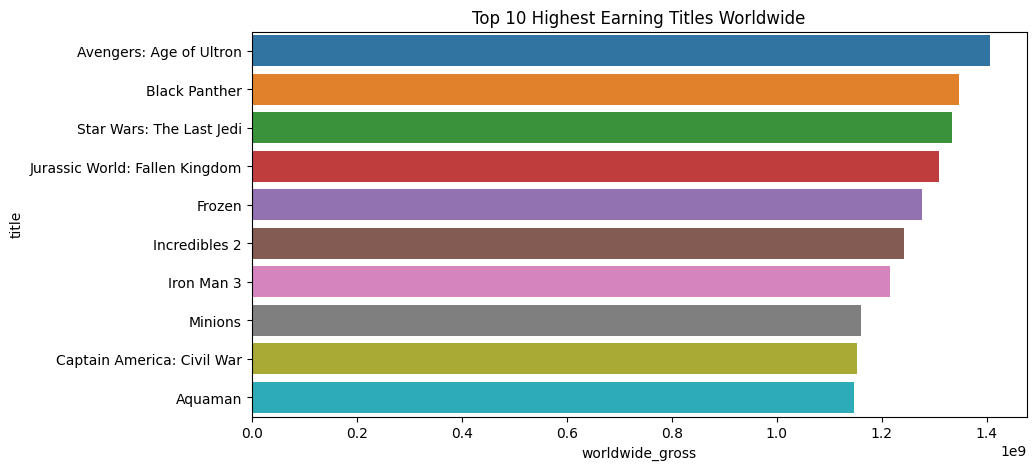

In [356]:
#Top 100 highest earning titles
top_100 = dfimdb2.nlargest(100, 'worldwide_gross')[['title','genres','worldwide_gross']]\
.set_index('title')

#Plotting sing seaborn - just the top 10 for ease of view
ax, bar= plt.subplots(figsize=(10,5))
sns.barplot(x="worldwide_gross", y=top_100.head(10).index, data=top_100.head(10))
plt.title("Top 10 Highest Earning Titles Worldwide")

plt.show()

2. Plotting Worldwide gross against genre

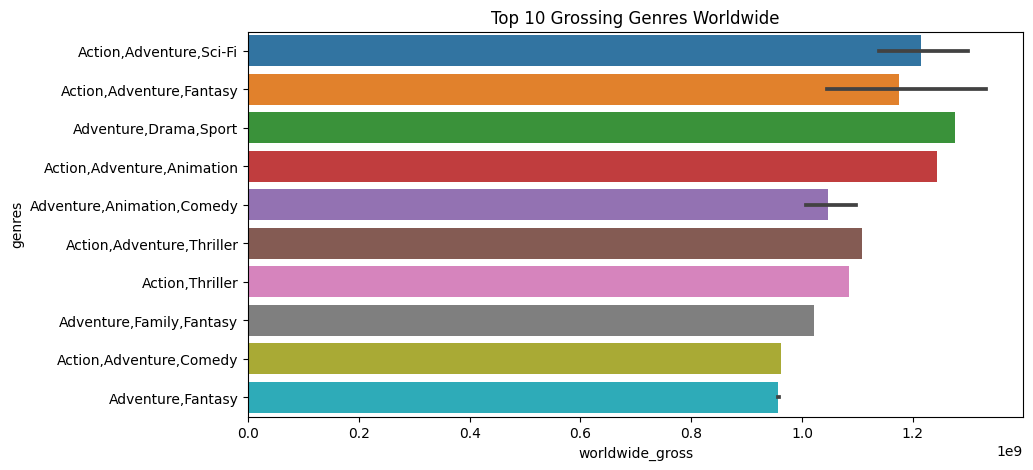

In [357]:
#Top 100 highest earning titles
top_100 = dfimdb2.nlargest(100, 'worldwide_gross')[['title','genres','worldwide_gross']]\
.set_index('title')

#Plotting using seaborn - just the top 10 for ease of view
ax, bar= plt.subplots(figsize=(10,5))
sns.barplot(x="worldwide_gross", y="genres", data=top_100.head(25))
plt.title("Top 10 Grossing Genres Worldwide")

plt.show()

3. Checking the relationship between rating and worldwide gross

Text(0.5, 1.0, 'Rating vs. Worldwide Gross')

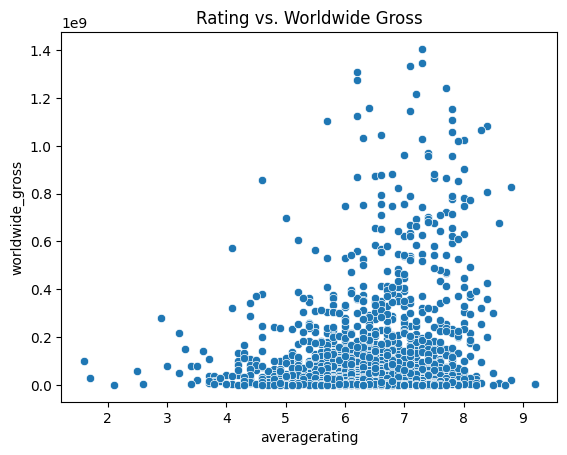

In [358]:
#plotting using seaborn
sns.scatterplot(x="averagerating", y="worldwide_gross", data=dfimdb2)
plt.title("Rating vs. Worldwide Gross")

4. Checking the relationship between runtime and worldwide gross

Text(0.5, 1.0, 'Runtime vs. Worldwide Gross')

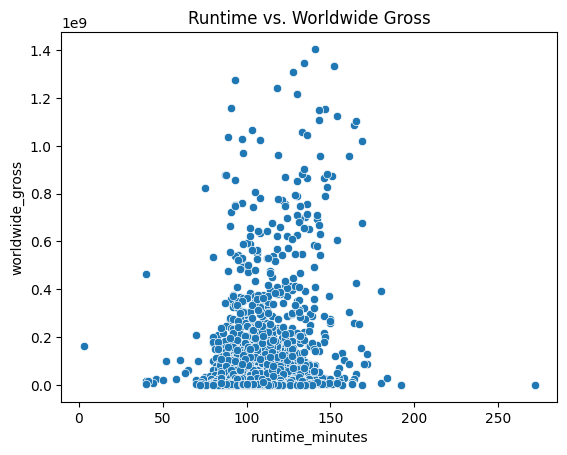

In [359]:
sns.scatterplot(x="runtime_minutes", y="worldwide_gross", data=dfimdb2)
plt.title("Runtime vs. Worldwide Gross")

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***